In [26]:
import importlib, data, LSTM_returns, optimization
import pandas as pd
import numpy as np
importlib.reload(data)

<module 'data' from 'c:\\Users\\27904\\OneDrive\\桌面\\crypto-main\\AAA_Thursday1\\data\\__init__.py'>

In [27]:
importlib.reload(data)
# Step 1: load each asset's df using data module
XLM_df = data.load_asset('XLMUSDC')
BTC_df = data.load_asset('BTCUSDC')

In [28]:
importlib.reload(data)

# Step 2: pre-process each asset's df using the data module
dfs = []
for df in [XLM_df, BTC_df]:
    df = df.copy()
    df = data.subset(df, start=pd.Timestamp('2024-12-04 08:00:00'), end=pd.Timestamp('2026-01-01'))
    print(data.report_gaps(df))
    df = data.add_returns(df)
    df = data.add_lookback_returns(df, lookback=5)
    df.dropna(inplace=True)
    df = data.normalize_data(df)
    df = data.train_test_split(df, split=0.8)
    dfs.append(df)

[XLM_df, BTC_df] = dfs

[]
[]


In [33]:
importlib.reload(LSTM_returns)

# Step 3: create and train LSTMs using various hyperparameters using the LSTM_returns module
LSTMs = []
train_X_y_s = []

for df in [XLM_df, BTC_df]:
    features = df.columns
    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume',
        'Number of trades', 'Taker buy base asset volume',
        'Taker buy quote asset volume', 'Return_Lookback_1',
        'Return_Lookback_2', 'Return_Lookback_3', 'Return_Lookback_4',
        'Return_Lookback_5']
    target = "Return"

    train_X_y = LSTM_returns.vectorize_train_data(df, target=target, features=features, episode_length=5)
    train_X_y_s.append(train_X_y)

    hyperparams = {
        'input_shape': train_X_y['train_X'].shape[1:],
    }

    LSTM = LSTM_returns.create(hyperparams)

    LSTM_returns.train(LSTM, hyperparams, train_X_y)

    LSTMs.append(LSTM)

XLM_LSTM, BTC_LSTM = LSTMs
XLM_train_X_y, BTC_train_X_y = train_X_y_s

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3234 - mae: 0.4245
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0561 - mae: 0.1814
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0124 - mae: 0.0856
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mae: 0.0341
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3030e-04 - mae: 0.0152
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6947e-04 - mae: 0.0095
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0750e-04 - mae: 0.0075
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0437e-04 - mae: 0.0073
Epoch 9/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.9167e-05 - mae: 0.0072
Epoch 10/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0267e-04 - mae: 0.0073
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Epoch 1/10


c:\Users\27904\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.4081 - mae: 0.4727
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0626 - mae: 0.1923
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166 - mae: 0.0974
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mae: 0.0509
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011 - mae: 0.0239
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8876e-04 - mae: 0.0097
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.6425e-05 - mae: 0.0055
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1254e-05 - mae: 0.0041
Epoch 9/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1073e-05 - mae: 0.0038
Epoch 10/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7325e-05 - mae: 0.0037
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [34]:
# importlib.reload(LSTM_returns)
# Step 4: evaluate each of the LSTMs using the LSTM_returns module
LSTM_returns.evaluate(LSTM, train_X_y['train_X'], train_X_y['train_y'])

# Step 5: using a test_data_iterator from data module, run LSTM predictions and through optimization.
#         keep track of the returns at each step
# Step 6: compare to a buy-and-hold benchmark using PyPortfolioOpt to get returns at each step.

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


{'mse': 2.066660299951108e-05, 'r2': -0.0708351839283996}

In [38]:
XLM_pre = XLM_LSTM.predict(XLM_train_X_y['test_X'])
BTC_pre = BTC_LSTM.predict(BTC_train_X_y['test_X'])
    

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [42]:
XLM_train_X_y['test_X'].shape

(1125, 5, 14)

In [39]:
np.mean(BTC_pre)

np.float32(-0.0017958806)

In [40]:
XLM_pre

array([[0.00491404],
       [0.00487026],
       [0.00480496],
       ...,
       [0.00577543],
       [0.00586292],
       [0.00589083]], dtype=float32)

In [ ]:
importlib.reload(LSTM_returns)
XLM_train_X_y = LSTM_returns.vectorize_train_data(XLM_df, target=target, features=features, episode_length=5)
BTC_train_X_y = LSTM_returns.vectorize_train_data(BTC_df, target=target, features=features, episode_length=5)


In [ ]:
import numpy as np
importlib.reload(optimization)

r_xlm = XLM_pre.flatten()
r_btc = BTC_pre.flatten()
T = len(r_xlm)

# 3) Build the full (T,3) mu_preds array:
#    [ r_xlm(t), r_btc(t), 0.0 ]
mu_preds = np.vstack([
    r_xlm,
    r_btc,
    np.zeros(T)                # stable asset return is always zero
]).T                            # now shape (T,3)

# 4) Set up the loop
n = 3
w_prev  = np.ones(n) / n         # e.g. start [1/3,1/3,1/3]
weights = np.zeros((T, n))

for t in range(T):
    mu_t  = mu_preds[t]          # shape (3,)
    w_new = optimization.max_return_with_turnover(
                mu=mu_t,
                w_prev=w_prev,
                turnover_penalty=10.0,  # tune to your strategy
                long_only=True
            )
    weights[t] = w_new
    w_prev    = w_new

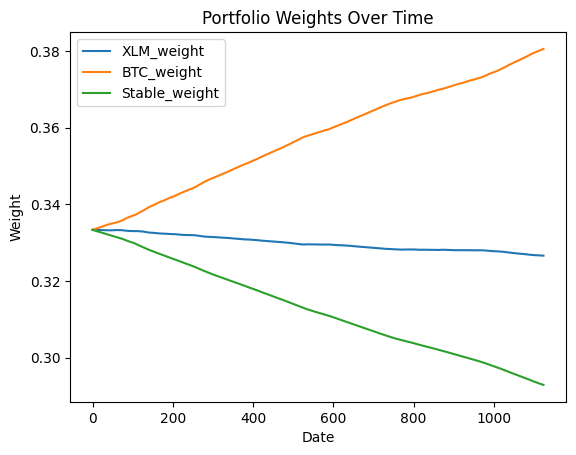

In [41]:
import matplotlib.pyplot as plt

# dates = T = len(r_xlm)   # your test‐set timestamps, length T
df_w  = pd.DataFrame(
    weights,
    # dates,
    columns=["XLM_weight","BTC_weight","Stable_weight"]
)

dummy_times = range(0, len(df_w))

plt.figure()
for col in df_w.columns:
    plt.plot(dummy_times, df_w[col], label=col)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Weight')
plt.title('Portfolio Weights Over Time')
plt.show()


In [ ]:
ret_xlm = np.array(XLM_df.loc[XLM_train_X_y['test_index']]["Return"])
ret_btc = np.array(XLM_df.loc[XLM_train_X_y['test_index']]["Return"])
ret_stable = np.zeros_like(ret_xlm)   
realized_rets = np.vstack([ret_xlm, ret_btc, ret_stable]).T          

In [ ]:
XLM_df.loc[XLM_train_X_y['test_index']].shape
weights.shape


(1125, 3)

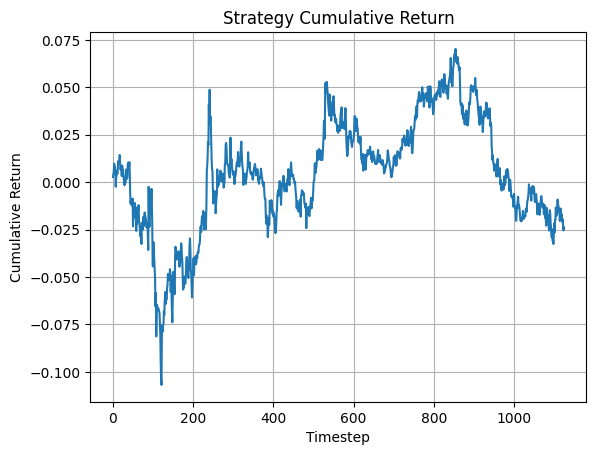

In [ ]:
port_rets = (weights * realized_rets).sum(axis=1)
cum_rets = np.cumprod(1 + port_rets) - 1
plt.plot(cum_rets)
plt.xlabel('Timestep')
plt.ylabel('Cumulative Return')
plt.title('Strategy Cumulative Return')
plt.grid(True)
plt.show()

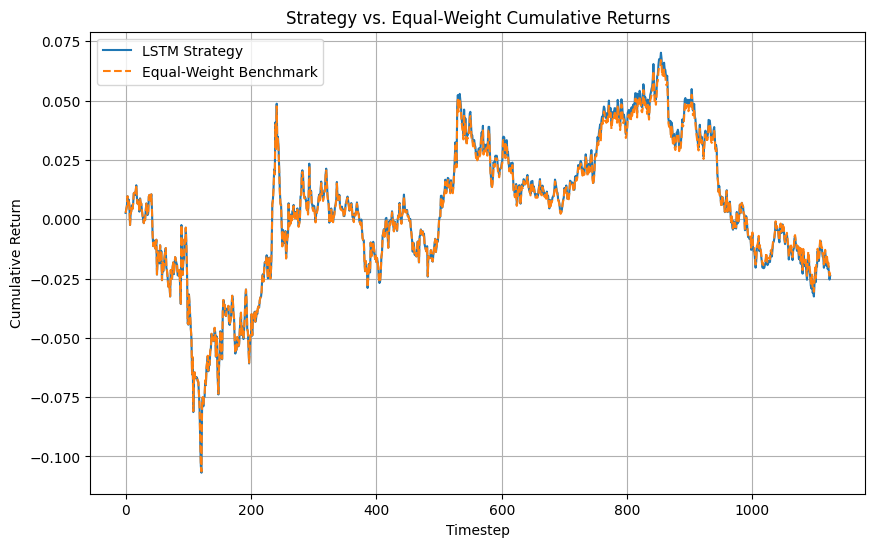

In [ ]:
port_rets   = (weights * realized_rets).sum(axis=1)        # (T,)
cum_rets    = np.cumprod(1 + port_rets) - 1               # (T,)

# 2) equal‑weight benchmark
n_assets    = weights.shape[1]
equal_w     = np.ones(n_assets) / n_assets                # (n_assets,)
eq_rets     = realized_rets.dot(equal_w)                  # (T,)
cum_eq_rets = np.cumprod(1 + eq_rets) - 1                 # (T,)

# 3) plot both
plt.figure(figsize=(10,6))
plt.plot(cum_rets,    label='LSTM Strategy')
plt.plot(cum_eq_rets, label='Equal‑Weight Benchmark', linestyle='--')
plt.xlabel('Timestep')
plt.ylabel('Cumulative Return')
plt.title('Strategy vs. Equal‑Weight Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train_idx = XLM_train_X_y['train_index']

XLM_raw_df = data.load_asset('XLMUSDC')
BTC_raw_df = data.load_asset('BTCUSDC')

xlm_prices   = XLM_raw_df.loc[train_idx, "Close"].rename("XLM")
btc_prices   = BTC_raw_df.loc[train_idx, "Close"].rename("BTC")

In [ ]:
mu_r

NameError: name 'mu_r' is not defined

In [ ]:
prices_risky

,XLM,BTC
Open time,,
2024-12-04 12:30:00,0.5071,96020.82
2024-12-04 13:00:00,0.5049,95705.25
2024-12-04 13:30:00,0.5075,95708.02
2024-12-04 14:00:00,0.5039,95832.01
2024-12-04 14:30:00,0.5065,95892.42
...,...,...
2025-03-08 08:00:00,0.2779,86154.96
2025-03-08 08:30:00,0.2765,86058.02
2025-03-08 09:00:00,0.2785,86337.97


In [ ]:
import numpy as np
import pandas as pd
from pypfopt.expected_returns     import mean_historical_return
from pypfopt.risk_models          import sample_cov, CovarianceShrinkage
from pypfopt.efficient_frontier    import EfficientFrontier

# 1) Build & clean your 2‑asset price DataFrame
prices_risky = pd.concat([xlm_prices, btc_prices], axis=1)
prices_risky = (
    prices_risky
    .apply(pd.to_numeric, errors="coerce")  # force floats, NaN out non‑numeric
    .replace([0, np.inf, -np.inf], np.nan)
    .dropna()
)

# 2) Annualize at 30‑min (48×365)
freq = 48 * 365

# 3) Compute expected returns
mu_r = mean_historical_return(prices_risky, frequency=freq)

# 4A) OPTION A: Ledoit‑Wolf shrinkage (recommended)
cs       = CovarianceShrinkage(prices_risky, frequency=freq)
Sigma_r  = cs.ledoit_wolf()

# 4B) OPTION B: add a tiny diagonal jitter to your sample covariance
# Sigma_r = sample_cov(prices_risky, frequency=freq)
# Sigma_r += 1e-4 * np.eye(Sigma_r.shape[0])

# 5) Solve for the max‑Sharpe (risky) weights
ef       = EfficientFrontier(mu_r, Sigma_r, weight_bounds=(0,1))
ef.max_sharpe(risk_free_rate=0.0)   # cash return = 0
w_risky  = ef.clean_weights()       # e.g. {'XLM':0.3,'BTC':0.6}

# 6) Allocate the remainder to cash
w_risky['Stable'] = 1 - sum(w_risky.values())

print("Max‑Sharpe w/ cash:", w_risky)



ValueError: at least one of the assets must have an expected return exceeding the risk-free rate

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

# assume you already have:
#   mu_r   → pd.Series of expected returns for ['XLM','BTC']
#   Sigma_r → pd.DataFrame covariance matrix for ['XLM','BTC']

# 1) Inspect μ
print("Estimated expected returns:")
print(mu_r)

# 2) Compute an adjusted RF just below the minimum μ
min_mu = mu_r.min()
rf_adj = min_mu - 1e-6
print(f"Adjusting risk-free rate to {rf_adj:.6f}")

# 3) Solve max‑Sharpe with the adjusted RF
ef = EfficientFrontier(mu_r, Sigma_r, weight_bounds=(0,1))
ef.max_sharpe(risk_free_rate=rf_adj)
w_risky = ef.clean_weights()

# 4) Allocate remainder to cash
w_risky['Stable'] = 1 - sum(w_risky.values())

print("Max‑Sharpe w/ adjusted RF:", w_risky)


Estimated expected returns:
XLM   -0.515079
BTC   -0.505002
dtype: float64
Adjusting risk-free rate to -0.515080
Max‑Sharpe w/ adjusted RF: OrderedDict({'XLM': 0.0, 'BTC': 1.0, 'Stable': 0.0})
